# Sugestões de Rotas ciclicas para Transporte de Ônibus Urbano

In [45]:
from _thread import *
from IPython.display import IFrame

import random
import threading
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Configuração para o algoritmo genético

In [46]:
totGeracoes  = 200
tamPopulacao = 35


indCruzamento = 10
CXPB = 0.5
MUTPB = 0.1
PROB_MUTACAO = 0.1
SEED_RANDOM = 64
#minimoAceitavel = 1
#pontuação baixo será eliminada do grafo
removerPior = 0

#fornecer ajuda para a evolucao do método
recebeAjuda  = False
ajudaQtd = 50

#Reforço no aprendizado
reforco = True

# Ajuste de 1.0 -> maximização ou -1.0 -> minimização da feature
feature1 = -1.0 #onemax
feature2 = 1.0 #dfs
feature3 = -1.0 #distancia dfs
feature4 = 1.0 #tam ciclo
feature5 = -1.0 #distancia ciclo

# Formato Imagens

In [47]:
'''
    Formatos Suportados salvar rotas e mapas: eps, pdf, pgf, png, ps, raw, rgba, svg, svgz 
'''
formato_imgs = 'pdf'

# Configuração da Imagens

In [48]:
'''
    configuração da imagens
'''
edge_color = "#000000"         # cor da aresta
bgcolor    = "#D3D3D3"     # cor do background
node_color = "#9370DB"     # cor da vértice
node_size  = 30            # Tamanho do vértice
fig_height = 20           # altura figura
fig_width  = 20           # largura figura

# Localização para o OSMNX gerar o Grafo

In [49]:
try:
    place = 'Boa Vista, Roraima, BR'
    Raio_distancia = 15000

    G = ox.graph_from_address( place, network_type='drive', simplify=True, distance=Raio_distancia )
except:
    print("Falha na Conexão!!")

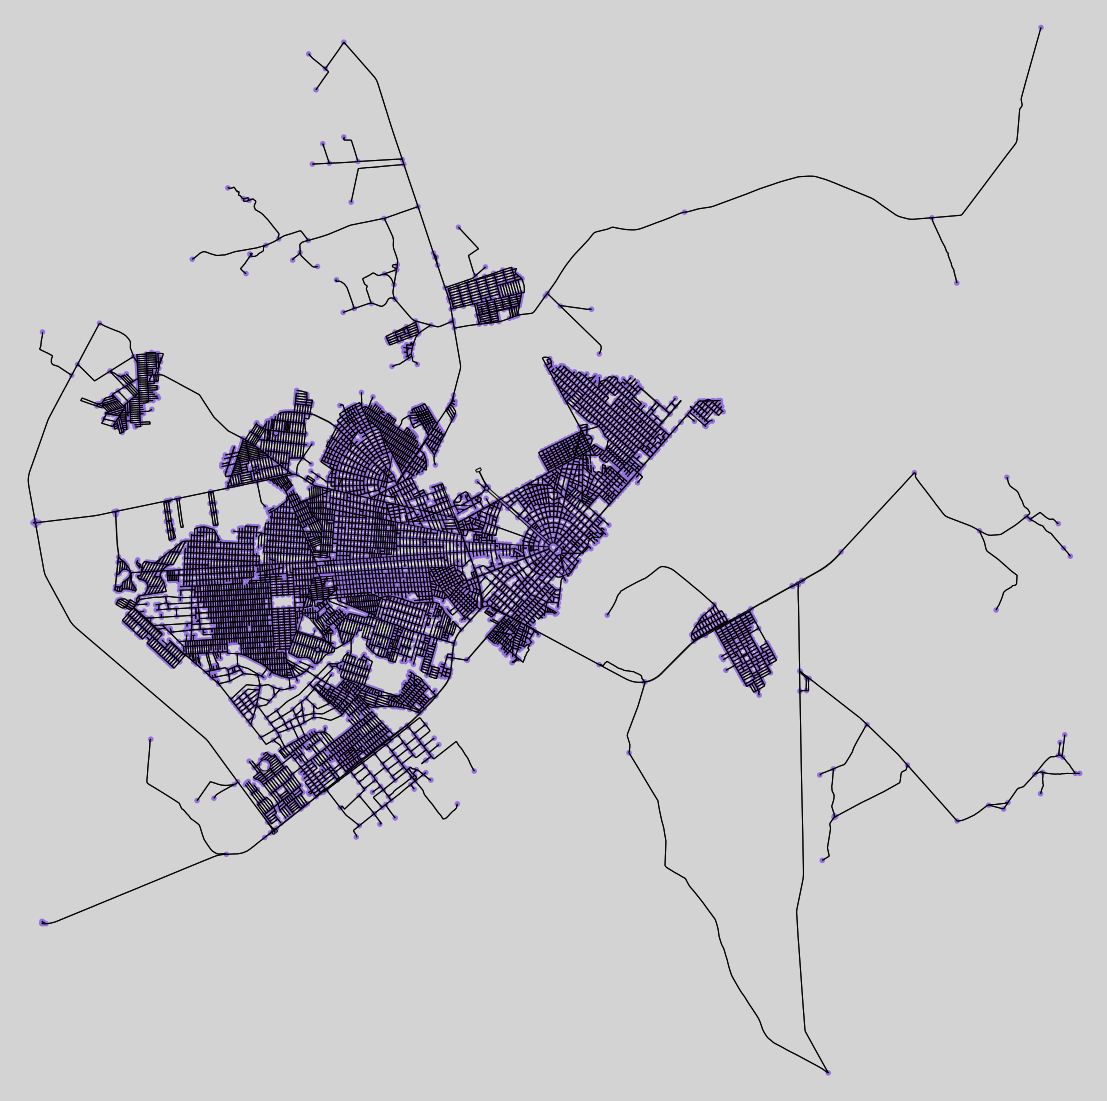

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3f9aacf630>)

In [50]:
ox.plot_graph(G, fig_height=fig_height, fig_width=fig_width, edge_color=edge_color, bgcolor=bgcolor, node_color=node_color, node_size=node_size, filename="mapaCompleto", save=True, file_format=formato_imgs)

# Vértice que representa o terminal de ônibus

In [51]:
nodosCentroCivico = ( 3648084763, 3648084762 )

# Extrai as informações das via do Grafo G

In [52]:
listaDados = []

dado = G.adj
for i in dado:
    for j in dado[i]:
        for k in dado[i][j]:
            print()
            print(dado[i][j][k])
            h = []
            h.append(i)
            h.append(j)
            h.append(dado[i][j][k])
            listaDados.append(h)


{'osmid': 348047232, 'oneway': True, 'name': 'Avenida A', 'highway': 'residential', 'length': 336.357}

{'osmid': 519374475, 'oneway': True, 'name': 'Avenida Pérola', 'highway': 'residential', 'length': 13.196}

{'osmid': 348047241, 'name': 'Avenida Normandia', 'highway': 'residential', 'oneway': False, 'length': 75.151}

{'osmid': 348049270, 'name': 'Rua José Maria Carneiro', 'highway': 'residential', 'oneway': False, 'length': 159.901}

{'osmid': 348047241, 'name': 'Avenida Normandia', 'highway': 'residential', 'oneway': False, 'length': 60.983999999999995, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8e4a62e8>}

{'osmid': 348047239, 'oneway': True, 'name': 'Avenida Uiramutã', 'highway': 'residential', 'length': 68.246}

{'osmid': 348049270, 'name': 'Rua José Maria Carneiro', 'highway': 'residential', 'oneway': False, 'length': 9.175}

{'osmid': 348049270, 'name': 'Rua José Maria Carneiro', 'highway': 'residential', 'oneway': False, 'length': 159.901}

{'osmid

{'osmid': 160117872, 'name': 'Rua S-33', 'highway': 'residential', 'oneway': False, 'length': 219.214, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8dca8ac8>}

{'osmid': 160117873, 'name': 'Rua Raimundo Alves de Souza', 'highway': 'residential', 'oneway': False, 'length': 16.796}

{'osmid': 459875098, 'name': 'Rua CC-07', 'highway': 'residential', 'oneway': False, 'length': 33.816}

{'osmid': [314733522, 459875098], 'name': ['Rua CC-07', 'Rua CC-8'], 'highway': 'residential', 'oneway': False, 'length': 279.856, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8dca8b00>}

{'osmid': 129300431, 'name': 'Rua Caubi Brasil de Magalhães', 'highway': 'residential', 'oneway': False, 'length': 57.516}

{'osmid': 160117869, 'name': 'Rua Carmelo', 'highway': 'residential', 'oneway': False, 'length': 44.419}

{'osmid': 160117869, 'name': 'Rua Carmelo', 'highway': 'residential', 'oneway': False, 'length': 163.106}

{'osmid': 160117890, 'name': 'Rua Secundina

{'osmid': 156568671, 'oneway': False, 'name': 'Travessa Dalício Amorim', 'highway': 'residential', 'length': 321.261}

{'osmid': 367369019, 'name': 'Rua Rui Barbosa', 'highway': 'residential', 'oneway': False, 'length': 70.819}

{'osmid': 367369019, 'name': 'Rua Rui Barbosa', 'highway': 'residential', 'oneway': False, 'length': 202.053}

{'osmid': 156568674, 'name': 'Rua Juaperi', 'highway': 'residential', 'oneway': False, 'length': 100.531, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8dc77a58>}

{'osmid': 156568667, 'oneway': False, 'name': 'Rua Almério Mota Pereira', 'highway': 'residential', 'length': 183.53, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8dc77a90>}

{'osmid': [459454233, 551183124], 'oneway': True, 'lanes': '2', 'name': 'Avenida Princesa Isabel', 'highway': 'secondary', 'length': 63.793, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8dc77ac8>}

{'osmid': 551183124, 'oneway': True, 'lanes': '2', 'nam

{'osmid': 158464744, 'oneway': False, 'name': 'Rua Hungria', 'highway': 'residential', 'length': 165.577}

{'osmid': 719057702, 'oneway': False, 'name': 'Rua Paraguai', 'highway': 'residential', 'length': 60.436}

{'osmid': 719057702, 'oneway': False, 'name': 'Rua Paraguai', 'highway': 'residential', 'length': 62.716}

{'osmid': 159918600, 'name': 'Rua Zuldimar Saraiva de Pinho', 'highway': 'residential', 'oneway': False, 'length': 151.529}

{'osmid': 159921466, 'name': 'Rua Tenente Braz Barros da Silva', 'highway': 'residential', 'oneway': False, 'length': 95.116}

{'osmid': 159921466, 'name': 'Rua Tenente Braz Barros da Silva', 'highway': 'residential', 'oneway': False, 'length': 100.125}

{'osmid': 159918600, 'name': 'Rua Zuldimar Saraiva de Pinho', 'highway': 'residential', 'oneway': False, 'length': 135.3, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8dbfe2e8>}

{'osmid': 389298381, 'oneway': True, 'name': 'Avenida João Liberato', 'highway': 'secondary', 'le

{'osmid': 158466619, 'name': 'Rua Rosa Pardana', 'highway': 'residential', 'oneway': False, 'length': 83.742}

{'osmid': 158466619, 'name': 'Rua Rosa Pardana', 'highway': 'residential', 'oneway': False, 'length': 11.236}

{'osmid': 655031091, 'oneway': True, 'name': 'Via das Flores', 'highway': 'secondary', 'length': 94.133}

{'osmid': 157802690, 'oneway': True, 'name': 'Via das Flores', 'highway': 'secondary', 'length': 83.094}

{'osmid': 158514731, 'name': 'Rua das Orquídeas', 'highway': 'residential', 'oneway': False, 'length': 11.007}

{'osmid': 158514731, 'name': 'Rua das Orquídeas', 'highway': 'residential', 'oneway': False, 'length': 75.656, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8db35f28>}

{'osmid': 159189117, 'name': 'Rua Santa Rita', 'highway': 'residential', 'oneway': False, 'length': 187.534}

{'osmid': 368956280, 'oneway': True, 'name': 'Avenida Centenário', 'highway': 'secondary', 'maxspeed': '50', 'length': 98.955}

{'osmid': 156569530, 'nam

{'osmid': 655959180, 'name': 'Rua CC-34', 'highway': 'residential', 'oneway': False, 'length': 5.534}

{'osmid': 733521267, 'oneway': True, 'name': 'Rua CC-34', 'highway': 'residential', 'length': 8.125}

{'osmid': 154903724, 'highway': 'secondary', 'junction': 'roundabout', 'oneway': True, 'length': 9.116, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8daa1ef0>}

{'osmid': 157869166, 'oneway': False, 'name': 'Avenida Getúlio Vargas', 'highway': 'secondary', 'length': 163.393, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8daa1f28>}

{'osmid': 383719581, 'highway': 'residential', 'oneway': False, 'length': 104.219, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8daa1fd0>}

{'osmid': 383719581, 'highway': 'residential', 'oneway': False, 'length': 90.884, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8daaf048>}

{'osmid': 511188102, 'highway': 'residential', 'oneway': False, 'length': 328.06, 'geometry


{'osmid': 160276524, 'name': 'Rua dos Astros', 'highway': 'residential', 'oneway': False, 'length': 84.2}

{'osmid': 160280969, 'name': 'Rua Rio Tocantins', 'highway': 'residential', 'oneway': False, 'length': 145.055}

{'osmid': 160280969, 'name': 'Rua Rio Tocantins', 'highway': 'residential', 'oneway': False, 'length': 146.539}

{'osmid': 160279259, 'highway': 'residential', 'oneway': False, 'length': 77.032}

{'osmid': 160279259, 'highway': 'residential', 'oneway': False, 'length': 77.602}

{'osmid': 160280988, 'name': 'Rua Estrela do Norte', 'highway': 'residential', 'oneway': False, 'length': 142.149}

{'osmid': 718607636, 'name': 'Avenida Sol Nascente', 'highway': 'tertiary', 'oneway': False, 'length': 80.723}

{'osmid': 718607636, 'name': 'Avenida Sol Nascente', 'highway': 'tertiary', 'oneway': False, 'length': 75.63}

{'osmid': 721782582, 'name': 'Rua Estrela do Sul', 'highway': 'residential', 'oneway': False, 'length': 144.093}

{'osmid': [718607640, 721782582], 'name': 'Rua 

{'osmid': 226403721, 'oneway': False, 'name': 'Rua Ramiro Damasceno da Silva', 'highway': 'residential', 'length': 193.677}

{'osmid': 156357715, 'oneway': True, 'name': 'Rua Edson Castro', 'highway': 'residential', 'length': 18.867}

{'osmid': 156357716, 'oneway': True, 'name': 'Via das Flores', 'highway': 'secondary', 'length': 67.428, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8da85e48>}

{'osmid': 226403721, 'oneway': False, 'name': 'Rua Ramiro Damasceno da Silva', 'highway': 'residential', 'length': 70.127}

{'osmid': 368956281, 'oneway': True, 'name': 'Avenida Centenário', 'highway': 'secondary', 'maxspeed': '50', 'length': 144.337, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8da38080>}

{'osmid': 396293551, 'highway': 'tertiary', 'junction': 'roundabout', 'oneway': True, 'length': 13.196000000000002, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8da380b8>}

{'osmid': 226403703, 'oneway': False, 'lanes': '2', 

{'osmid': 430268524, 'oneway': True, 'name': 'Rua Nagib Eluan', 'highway': 'tertiary', 'length': 61.489}

{'osmid': 156357717, 'oneway': False, 'name': 'Rua Nagib Eluan', 'highway': 'tertiary', 'length': 11.154}

{'osmid': 156357717, 'oneway': False, 'name': 'Rua Nagib Eluan', 'highway': 'tertiary', 'length': 49.003}

{'osmid': 159176878, 'name': 'Rua Raimunda de Oliveira Matos', 'highway': 'residential', 'oneway': False, 'length': 107.783}

{'osmid': 159176894, 'name': 'Rua Antônio Marquês', 'highway': 'residential', 'oneway': False, 'length': 158.266}

{'osmid': 159912774, 'name': 'Rua Manoel Sabino dos Santos', 'highway': 'residential', 'oneway': False, 'length': 7.932}

{'osmid': 389298380, 'oneway': False, 'name': 'Rua Manoel Sabino dos Santos', 'highway': 'residential', 'length': 192.14, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d945f60>}

{'osmid': 389298381, 'oneway': True, 'name': 'Avenida João Liberato', 'highway': 'secondary', 'length': 107.9129999

{'osmid': 430843122, 'name': 'Rua Lauro Alexandre da Silva', 'highway': 'residential', 'oneway': False, 'length': 151.97}

{'osmid': 430843122, 'name': 'Rua Lauro Alexandre da Silva', 'highway': 'residential', 'oneway': False, 'length': 150.36, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f9ebd8cc0>}

{'osmid': 226443641, 'oneway': False, 'highway': 'unclassified', 'length': 214.0, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f9ebd8dd8>}

{'osmid': 226443644, 'oneway': False, 'highway': 'unclassified', 'length': 234.88500000000002, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f9ebd8f28>}

{'osmid': 226443644, 'oneway': False, 'highway': 'unclassified', 'length': 680.9559999999999, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f9ebd8208>}

{'osmid': 160155805, 'oneway': True, 'name': 'Avenida Abel Monteiro Reis', 'highway': 'tertiary', 'length': 155.047}

{'osmid': 733460209, 'name': 'Rua Izidio Galdi

{'osmid': 91888068, 'name': 'Rua Dom José Nepote', 'highway': 'residential', 'oneway': False, 'length': 120.53}

{'osmid': 91888068, 'name': 'Rua Dom José Nepote', 'highway': 'residential', 'oneway': False, 'length': 130.636}

{'osmid': 719519142, 'name': 'Rua Alferes Paulo Saldanha', 'highway': 'tertiary', 'oneway': False, 'length': 57.4}

{'osmid': 719519142, 'name': 'Rua Alferes Paulo Saldanha', 'highway': 'tertiary', 'oneway': False, 'length': 143.393}

{'osmid': 91888050, 'name': 'Rua Lourenço Belforte', 'highway': 'residential', 'oneway': False, 'length': 272.81}

{'osmid': 495229558, 'oneway': True, 'name': 'Avenida Mário Homem de Melo', 'highway': 'secondary', 'length': 129.738}

{'osmid': 91888131, 'name': 'Rua Edmur Oliva', 'highway': 'residential', 'oneway': False, 'length': 133.887}

{'osmid': 29231449, 'oneway': True, 'name': 'Avenida Capitão Júlio Bezerra', 'highway': 'secondary', 'length': 163.52800000000002, 'geometry': <shapely.geometry.linestring.LineString object at 


{'osmid': 158941111, 'name': 'Rua Deusdete Coelho', 'highway': 'residential', 'oneway': False, 'length': 14.395}

{'osmid': 158935579, 'name': 'Rua Totinho Mota', 'highway': 'residential', 'oneway': False, 'length': 164.779}

{'osmid': 158935579, 'name': 'Rua Totinho Mota', 'highway': 'residential', 'oneway': False, 'length': 166.879}

{'osmid': 158941111, 'name': 'Rua Deusdete Coelho', 'highway': 'residential', 'oneway': False, 'length': 94.208}

{'osmid': 158941111, 'name': 'Rua Deusdete Coelho', 'highway': 'residential', 'oneway': False, 'length': 94.597}

{'osmid': 158941168, 'name': 'Rua Aroeira', 'highway': 'residential', 'oneway': False, 'length': 167.493}

{'osmid': 719497311, 'name': 'Rua Deusdete Coelho', 'highway': 'residential', 'oneway': False, 'length': 94.429}

{'osmid': 719497311, 'name': 'Rua Deusdete Coelho', 'highway': 'residential', 'oneway': False, 'length': 97.633}

{'osmid': 158941168, 'name': 'Rua Aroeira', 'highway': 'residential', 'oneway': False, 'length': 1

{'osmid': 129300226, 'name': 'Rua José Queiroz', 'highway': 'residential', 'oneway': False, 'length': 227.816}

{'osmid': 338487911, 'oneway': True, 'name': 'Avenida Mário Homem de Melo', 'highway': 'secondary', 'length': 92.383}

{'osmid': 717785828, 'name': 'Rua José Queiroz', 'highway': 'residential', 'oneway': False, 'length': 203.324}

{'osmid': 129300220, 'name': 'Rua Antônio Pinheiro Galvão', 'highway': 'residential', 'oneway': False, 'length': 232.325}

{'osmid': 129300220, 'name': 'Rua Antônio Pinheiro Galvão', 'highway': 'residential', 'oneway': False, 'length': 204.384}

{'osmid': 338487911, 'oneway': True, 'name': 'Avenida Mário Homem de Melo', 'highway': 'secondary', 'length': 99.918}

{'osmid': 129300209, 'name': 'Rua Raimundo Filgueiras', 'highway': 'residential', 'oneway': False, 'length': 237.478}

{'osmid': 129300209, 'name': 'Rua Raimundo Filgueiras', 'highway': 'residential', 'oneway': False, 'length': 205.725}

{'osmid': 338487911, 'oneway': True, 'name': 'Avenida 

{'osmid': 160367801, 'lanes': '2', 'name': 'Rua Sirius', 'highway': 'residential', 'maxspeed': '30', 'oneway': False, 'length': 74.147}

{'osmid': 160367820, 'name': 'Rua Carpicórnio', 'highway': 'residential', 'oneway': False, 'length': 296.866}

{'osmid': 160367820, 'name': 'Rua Carpicórnio', 'highway': 'residential', 'oneway': False, 'length': 297.797}

{'osmid': 158441489, 'name': 'Rua Tambaqui', 'highway': 'residential', 'oneway': False, 'length': 127.429}

{'osmid': 158441489, 'name': 'Rua Tambaqui', 'highway': 'residential', 'oneway': False, 'length': 40.302}

{'osmid': 718551343, 'name': 'Rua Acará-Açu', 'highway': 'tertiary', 'oneway': False, 'length': 64.61}

{'osmid': 158441472, 'name': 'Rua Poraquê', 'highway': 'residential', 'oneway': False, 'length': 64.75}

{'osmid': 158441472, 'name': 'Rua Poraquê', 'highway': 'residential', 'oneway': False, 'length': 61.807}

{'osmid': 718752657, 'name': 'Rua das Orquídeas', 'highway': 'residential', 'oneway': False, 'length': 193.766}

{'osmid': 160273211, 'name': 'Rua Eugênio Brlíglia Monteiro', 'highway': 'residential', 'oneway': False, 'length': 1209.514, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8db1ae10>}

{'osmid': 160371231, 'highway': 'residential', 'oneway': False, 'length': 233.954, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8db1ae48>}

{'osmid': 669592396, 'highway': 'residential', 'oneway': False, 'length': 137.5, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8db1ae80>}

{'osmid': 669592396, 'highway': 'residential', 'oneway': False, 'length': 66.886, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8db1aeb8>}

{'osmid': 476315195, 'name': 'Avenida Boa Vista', 'highway': 'residential', 'oneway': False, 'length': 12.39}

{'osmid': 519374475, 'oneway': True, 'name': 'Avenida Pérola', 'highway': 'residential', 'length': 39.241}

{'osmid': [476315208, 476315195], 'name': ['Avenida Boa Vista', 'Rua São Silvestre'], 'hig


{'osmid': 494247482, 'oneway': True, 'lanes': '2', 'name': 'Avenida Universo', 'highway': 'tertiary', 'maxspeed': '60', 'length': 298.028}

{'osmid': 519186180, 'oneway': True, 'name': 'Avenida Gêmeos', 'highway': 'tertiary', 'length': 8.133}

{'osmid': 494241713, 'oneway': True, 'name': 'Avenida Universo', 'highway': 'tertiary', 'length': 297.762}

{'osmid': 519186180, 'oneway': True, 'name': 'Avenida Gêmeos', 'highway': 'tertiary', 'length': 75.122}

{'osmid': 312633005, 'name': 'Rua Pedro Camargo', 'highway': 'residential', 'oneway': False, 'length': 11.942}

{'osmid': 312633005, 'name': 'Rua Pedro Camargo', 'highway': 'residential', 'oneway': False, 'length': 295.92}

{'osmid': 519186180, 'oneway': True, 'name': 'Avenida Gêmeos', 'highway': 'tertiary', 'length': 75.928}

{'osmid': 312633004, 'name': 'Rua Universidade Estadual de Roraima', 'highway': 'residential', 'oneway': False, 'length': 298.66}

{'osmid': 312633004, 'name': 'Rua Universidade Estadual de Roraima', 'highway': 'r

{'osmid': 154913907, 'name': 'Rua Coronel Ricardo Franco', 'highway': 'residential', 'oneway': False, 'length': 149.242}

{'osmid': 154913907, 'name': 'Rua Coronel Ricardo Franco', 'highway': 'residential', 'oneway': False, 'length': 92.819}

{'osmid': 154913926, 'name': 'Rua Roberto Costa', 'highway': 'residential', 'oneway': False, 'length': 80.357}

{'osmid': 154913926, 'name': 'Rua Roberto Costa', 'highway': 'residential', 'oneway': False, 'length': 143.414}

{'osmid': 366752602, 'name': 'Rua João XXIII', 'highway': 'residential', 'oneway': False, 'length': 101.039}

{'osmid': 366752602, 'name': 'Rua João XXIII', 'highway': 'residential', 'oneway': False, 'length': 105.258}

{'osmid': 720087758, 'name': 'Rua Álvaro Maia', 'highway': 'residential', 'oneway': False, 'length': 117.738}

{'osmid': 158785888, 'name': 'Rua Perimetral Norte', 'highway': 'residential', 'oneway': False, 'length': 147.741}

{'osmid': 158785888, 'name': 'Rua Perimetral Norte', 'highway': 'residential', 'onewa

{'osmid': 511186650, 'highway': 'residential', 'oneway': False, 'length': 210.615, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8da59dd8>}

{'osmid': 345305759, 'highway': 'residential', 'oneway': False, 'length': 21.498}

{'osmid': 345305759, 'highway': 'residential', 'oneway': False, 'length': 62.717}

{'osmid': 730940120, 'highway': 'residential', 'oneway': False, 'length': 23.221}

{'osmid': 730940117, 'highway': 'residential', 'oneway': False, 'length': 134.875, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8da59eb8>}

{'osmid': 345305731, 'highway': 'residential', 'oneway': False, 'length': 60.158}

{'osmid': [615577706, 476321931, 615577703], 'highway': 'residential', 'oneway': False, 'length': 605.512, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8da59ef0>}

{'osmid': 345305731, 'highway': 'residential', 'oneway': False, 'length': 58.105}

{'osmid': [476321931, 476321932], 'highway': 'residential', 'oneway': Fa

{'osmid': 655696490, 'name': 'Rua Nivaldo da Conceição Gutierrez', 'highway': 'residential', 'oneway': False, 'length': 62.913}

{'osmid': 655696490, 'name': 'Rua Nivaldo da Conceição Gutierrez', 'highway': 'residential', 'oneway': False, 'length': 67.958}

{'osmid': 157802686, 'name': 'Rua Raimundo Alves de Souza', 'highway': 'secondary', 'oneway': False, 'length': 74.043}

{'osmid': 157802686, 'name': 'Rua Raimundo Alves de Souza', 'highway': 'secondary', 'oneway': False, 'length': 69.449}

{'osmid': 655702301, 'name': 'Rua CL Osvaldo Paes Carolino', 'highway': 'residential', 'oneway': False, 'length': 45.448}

{'osmid': 430666912, 'name': 'Rua Tarcilo Ayres', 'highway': 'residential', 'oneway': False, 'length': 168.009}

{'osmid': 718752660, 'name': 'Rua Nivaldo da Conceição Gutierrez', 'highway': 'residential', 'oneway': False, 'length': 61.514}

{'osmid': 718752660, 'name': 'Rua Nivaldo da Conceição Gutierrez', 'highway': 'residential', 'oneway': False, 'length': 68.643}

{'osmid'

{'osmid': 368956280, 'oneway': True, 'name': 'Avenida Centenário', 'highway': 'secondary', 'maxspeed': '50', 'length': 84.225}

{'osmid': 717430481, 'name': 'Rua Dom Pedro I', 'highway': 'tertiary', 'oneway': False, 'length': 23.94}

{'osmid': 717430481, 'name': 'Rua Dom Pedro I', 'highway': 'tertiary', 'oneway': False, 'length': 69.881}

{'osmid': 159188135, 'name': 'Rua São Camilo', 'highway': 'residential', 'oneway': False, 'length': 97.942}

{'osmid': 159188135, 'name': 'Rua São Camilo', 'highway': 'residential', 'oneway': False, 'length': 102.493}

{'osmid': 159189115, 'name': 'Rua São Jorge', 'highway': 'residential', 'oneway': False, 'length': 209.663}

{'osmid': 159189115, 'name': 'Rua São Jorge', 'highway': 'residential', 'oneway': False, 'length': 138.071}

{'osmid': 154903730, 'name': 'Avenida Santos Dumont', 'highway': 'residential', 'oneway': False, 'length': 79.471}

{'osmid': 154903730, 'name': 'Avenida Santos Dumont', 'highway': 'residential', 'oneway': False, 'length':


{'osmid': 160042647, 'name': 'Rua Surubim', 'highway': 'residential', 'oneway': False, 'length': 125.82499999999999, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d953da0>}

{'osmid': 225106321, 'name': 'Avenida General Ataíde Teive', 'highway': 'secondary', 'oneway': False, 'length': 80.048, 'geometry': <shapely.geometry.linestring.LineString object at 0x7f3f8d953dd8>}

{'osmid': 159181484, 'oneway': False, 'name': 'Rua Calebe', 'highway': 'residential', 'length': 20.157}

{'osmid': 159181484, 'oneway': False, 'name': 'Rua Calebe', 'highway': 'residential', 'length': 45.342}

{'osmid': 159992055, 'name': 'Avenida Padre Anchieta', 'highway': 'secondary', 'oneway': False, 'length': 171.314}

{'osmid': 129300217, 'oneway': False, 'name': 'Rua José Aleixo', 'highway': 'tertiary', 'length': 84.734}

{'osmid': 129300217, 'oneway': False, 'name': 'Rua José Aleixo', 'highway': 'tertiary', 'length': 84.72}

{'osmid': 160042653, 'name': 'Rua Mauro Vieira', 'highway': 're

# Gera uma lista com as pontuações que cada aresta recebeu dentre as suas características

In [53]:
listaValores = []
valorRuim = -1

for i in listaDados:
    soma = 0
    #print(i[2]['osmid'])    
    
    #---------------------------------------------------------------------------------------------------------            
    '''
    if 'maxspeed' in i[2] and isinstance( i[2]['maxspeed'], int ):
        if int(i[2]['maxspeed']) < 40 and int(i[2]['maxspeed']) > 60 or 'maxspeed' not in i[2]:
            soma = valorRuim
        else:
            soma += 5
    else:
        if 'maxspeed' in i[2]:
            p = 0
            j = 0
            for k in i[2]['maxspeed']:
                p += int(k)
                j+=1
            soma += (p/j)
        else:
            soma = valorRuim
    '''
    
    #---------------------------------------------------------------------------------------------------------
    if "highway" in i[2]:
        if i[2]['highway'] == "residential": #ex Rua Chicó Lira
            soma = valorRuim
        elif i[2]['highway'] == "primary": #ex: avenida venezuela
            soma = 1
        elif i[2]['highway'] == "secondary": #ex: Major Williams
            soma = 1
        elif i[2]['highway'] == "tertiary": #ex: Rua General Penha Brasil
            soma = 1
        else:
            soma = valorRuim
    
    
    #---------------------------------------------------------------------------------------------------------    
    #total de faixas da via
    '''
    if ("lanes" in i[2]) and ("oneway" in i[2]):
        liness = i[2]['lanes']
        if isinstance(liness , list):
            for d in liness:
                soma += int(d)
        else:
            soma = (int(liness) * 5) + 5 + soma
    else:
        
        if "lanes" in i[2]:
            soma +=  int(i[2]['lanes']) * 5
            
        #o resultado da maioria
        if "oneway" in i[2]:
            if i[2]['oneway'] == True:
                soma += 5                
            else:
                soma = valorRuim
    '''
    
    listaValores.append(soma)


# Separa os vértices que não conseguiram atingir a pontuação mínima para remoção do Grafo

In [54]:
remover = []

for i in range(len(listaValores)):
    #if listaValores[i] <= 0:
    if listaValores[i] <= removerPior:
        remover.append( (listaDados[i][0], listaDados[i][1]))
        
#remove as arestas que foram selecionadas como ruins 
G.remove_edges_from(remover)

# Atualiza a lista de arestas que estão aptas a serem selecionadas

In [55]:
listaValoresNew = []
listaDadosNew = []

for i in range(len(listaDados)):
    if listaValores[i] >= removerPior:
        listaValoresNew.append( listaValores[i] )
        listaDadosNew.append( listaDados[i] )

#remover os dados antigos para devolver memória
listaDados.clear()
listaValores.clear()
print(len(listaValoresNew))

7044


In [56]:
'''
    Acesso aos dados!

print(listaDadosNew[0])
print()
print(listaDadosNew[0][0])
print()
print(listaDadosNew[0][1])
print()
print(listaDadosNew[0][2])
print()
print(listaDadosNew[0][2]['name'])
'''

"\n    Acesso aos dados!\n\nprint(listaDadosNew[0])\nprint()\nprint(listaDadosNew[0][0])\nprint()\nprint(listaDadosNew[0][1])\nprint()\nprint(listaDadosNew[0][2])\nprint()\nprint(listaDadosNew[0][2]['name'])\n"

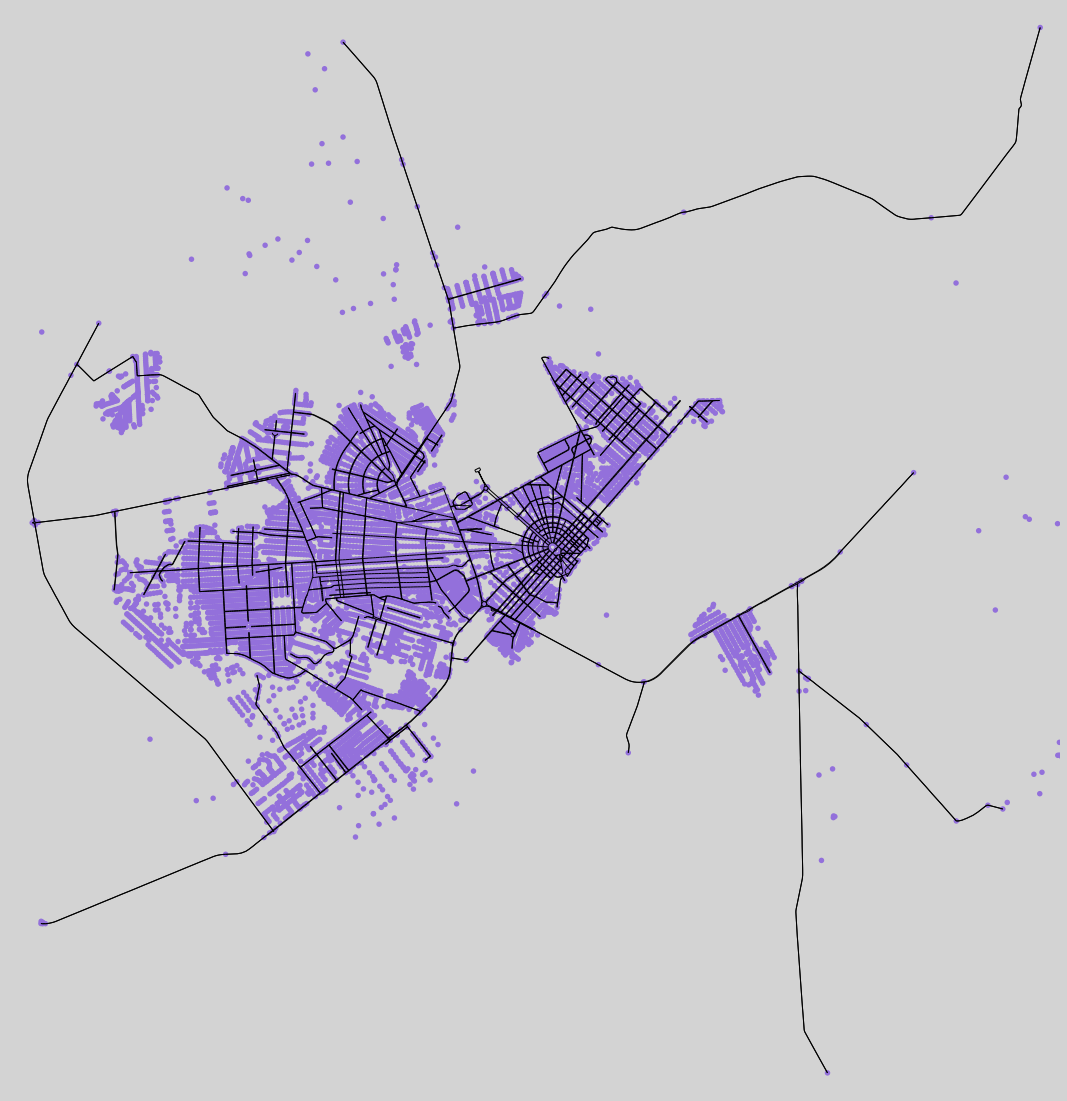

(<Figure size 1440x1440 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3f8f101240>)

In [57]:
ox.plot_graph(G, fig_height=fig_height, fig_width=fig_width, edge_color=edge_color, bgcolor=bgcolor, node_color=node_color, node_size=node_size, filename="mapaFiltrado", save=True,  file_format=formato_imgs)

# Lista que receberá os caminhos encontrados pelo AG

In [58]:
listaResultadoDFS = []
tamanhoDosCiclosSalvos = []

tamGenes = len( listaDadosNew )

# Lista para salvar as informações da evolução do AG para plotagem de gráfico ao final do experimento

In [59]:
PlotMinDadosONEMAX  = []
PlotMeanDadosONEMAX = []
PlotMaxDadosONEMAX  = []

PlotMinDadosDFS  = []
PlotMeanDadosDFS = []
PlotMaxDadosDFS  = []

PlotMinDistDFS = []
PlotMeanDistDFS = []
PlotMaxDistDFS = []

PlotMinTamCiclo = []
PlotMeanTamCiclo = []
PlotMaxTamCiclo = []

PlotMinDistCiclo = []
PlotMeanDistCiclo = []
PlotMaxDistCiclo = []

# Controle dos ciclos

In [60]:
PlotMaioresCiclos = []
PlotMaioresCiclos.append(0)

In [61]:
lenghtListaDadosnew = len(listaDadosNew)

# Reforço

In [62]:
reforco = [ 0 for _ in range(0, len(G.nodes)+1)]

# Busca em profundidade que encontrará os caminhos caso exista

In [63]:
def DFS_BuscaCiclo(grafo, mapa, mapaGrafo, verticeInicial, tamGrafo):
    
    import stack    
    pilha = stack.stack()
    v = verticeInicial
    
    #vetor de marcação de visitados e de elementos que estão na pilha O(1)
    visitados = []
    pilha_rec = []
    
    for i in range(tamGrafo):
        visitados.append(False)
        pilha_rec.append(False)
    
        
    it = -1
    contListaPercorrida = 0
    contDistPercorrida  = 0
    semDistancia = 0
    listaPercorrida = []
    controleMaiorCiclo = PlotMaioresCiclos[-1]
    
    tamanhoCicloRetorno = 0
    distanciaCicloRetorno = 0
    
    #inicio da BFS
    while True:
        achou_vizinho = False        
        
        listaPercorrida.append(v)
        contListaPercorrida += 1
                
        if not visitados[ mapa[ v ] ]:
            x = mapa[ v ]
            
            pilha.empilhar( x )
            visitados[ x ] = True
            pilha_rec[ x ] = True
            
            
        for it in grafo[v]:
            
            #se tiver na pilha é porque possue ciclo - Achou um Ciclo          
            if pilha_rec[ mapa[ it ] ] and it == verticeInicial:
                
                listaArestasCiclo = []
                
                for k in listaPercorrida:
                    if pilha_rec[ mapa[ k ] ] == True:
                        listaArestasCiclo.append( k )
                        
                tamList = len( listaArestasCiclo )
                
                tamanhoCicloRetorno = tamList
                distanciaCicloRetorno = contDistPercorrida
                
                '''
                    sempre salva ciclos maiores!
                '''
                if tamList > controleMaiorCiclo:
                    controleMaiorCiclo = tamList
                    
                    PlotMaioresCiclos.append( controleMaiorCiclo )
                                                        
                    '''
                        Pega o ciclo para salvar
                    '''
                    
                    cicloAtual = []
                    
                    #for k in range(1, len(listaArestasCiclo)):
                    for k in range(1, tamList):
                        cicloAtual.append( (listaArestasCiclo[k-1], listaArestasCiclo[k]) )
                    cicloAtual.append( ( listaArestasCiclo[-1], listaArestasCiclo[0] ) )
                    
                    cicloAtualList = list( cicloAtual )
                    listaResultadoDFS.append( cicloAtualList )
                    tamanhoDosCiclosSalvos.append( tamList )
                    
                else:
                    achou_vizinho = False
                    break
                
                    
            if not visitados[ mapa[ it ] ]:
                achou_vizinho = True
                break
                
        if not achou_vizinho:
            pilha_rec[ pilha.topo() ] = False
                
            pilha.desempilhar()
            
            if pilha.p_vazia():
                break
                
            v = mapaGrafo[ pilha.topo() ]
        
        else:
            # -------- pegar a distancia de A -> B ---------
            # do vertice A
            verticeAtual = v
            # para o vertice B
            verticeNovo  = it
            
            '''
            print(listaDadosNew[0])
            print()
            print(listaDadosNew[0][0])
            print()
            print(listaDadosNew[0][1])
            print()
            print(listaDadosNew[0][2])
            print()
            print(listaDadosNew[0][2]['name'])

            [321519672, 3589971255, {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary', 'length': 18.205}]

            321519672

            3589971255

            {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary',
            'length': 18.205}

            Rua Coronel Pinto

            '''
            try:

                '''
                    Pegar a distancia percorrida pela DFS..
                '''
                            
                for lista_i in range(lenghtListaDadosnew):            
                    if( listaDadosNew[lista_i][0] == verticeAtual and listaDadosNew[lista_i][1] == verticeNovo ):

                        if 'length' in listaDadosNew[lista_i][2]:
                            lenghtAresta = float(listaDadosNew[lista_i][2]['length'])
                            contDistPercorrida  = float(contDistPercorrida + lenghtAresta)
                        else:
                            semDistancia = semDistancia + 1
            except:
                print("Erro na distancia...")
            
            
            
            # ---------------------------------------------
            
            # da busca em profundidade troca o vertice para o proximo
            # ---- NAO mexer ----------
            v =  it
            # -------------------------
    
    '''
        calcular a distancia achada + a media das distancias nao achadas
    '''
    
    
    # distancia percorrida
    distanciaFinal = ( contDistPercorrida ) + ( 15 * semDistancia )
    #print("Distancia percorrida: {}".format(distanciaFinal))   
    
    '''
        Falta retornar a distancia percorrida junto com a contListaPercorrida
    '''
    
    # Retorna a quantidade de arestas visitadas na busca em profundidade
    return contListaPercorrida, distanciaFinal, tamanhoCicloRetorno, distanciaCicloRetorno 

# Função que executa um filtro para remover as arestas não selecionadas pelo AG e envia a DFS para validação de rotas

In [64]:
def temCicloDFS(individuo):
    
    # cópia do grafo
    G_aux = G.copy()
    
    tamNodes = len(G_aux.nodes)
    
    # ajuda na evolução do onemax
    if recebeAjuda == True:        
        for i in range(ajudaQtd):            
            #posicao = random.randint(0,tam-1)
            #individuo[posicao] = 1
            individuo[random.randint(0, tamGenes-1)] = 1
    
    
    ## Aprendizagem por reforço
    if reforco == True:
        for i in range(0, tamInd):
            if individuo[i] == 0 and reforco[i] > 0:
                individuo[i] = 1
        
                
    #identificador da posicao do nodo centro cívico para verificar se esta ativo
    for i in range(tamGenes):
        if listaDadosNew[i][0] == nodosCentroCivico[0] and listaDadosNew[i][1] == nodosCentroCivico[1]:
            individuo[i] = 1            
            break;
            
    
    #lista para remover os nós não selecionados pelo AG
    listaRemover = []            
        
    #Seleção dos nodos não selecionados
    #for i in range(len(individuo)):
    for i in range(tamGenes):
        if individuo[i] == 0:
            listaRemover.append( (listaDadosNew[i][0], listaDadosNew[i][1]) )            
        
        
    #Remove os nodos não selecionados pelo AG
    G_aux.remove_edges_from( listaRemover )
    
    
    
    #listaMapa recebe os valores de [0 a totNodos]
    listaMapa = []
    #for i in range(len(G_aux.nodes)):
    for i in range(tamNodes):
        listaMapa.append(i)
    
    
    # 215151515 --> 10
    mapa = pd.Series(index=G_aux.nodes, data=listaMapa)
    # 10 --> 215151515
    mapaGrafo = pd.Series(G_aux.nodes)
    
    
    '''
        DFS --- Busca um ciclo a partir do terminal de ônibus do centro Cívico 
    
    '''
       
    return DFS_BuscaCiclo(G_aux, mapa, mapaGrafo, nodosCentroCivico[0], len(G_aux.nodes))

# DEAP - ONEMAX

In [65]:
from deap import base
from deap import creator
from deap import tools
from deap import creator, base, tools, algorithms
import random


In [66]:
'''
    1) OneMax
    2) DFS
    3) Distancia percorrida DFS
    4) tamanho do ciclo
    5) distancia do trajeto da rota
'''
creator.create("FitnessMulti", base.Fitness, weights=(feature1, feature2, feature3, feature4, feature5))
creator.create("Individual", list, fitness=creator.FitnessMulti)

def evalFitness(individual):
    '''
        Retorno do método
        contListaPercorrida, distanciaFinal, tamanhoCicloRetorno, distanciaCicloRetorno
    '''
    tamDFS, distanciaDFS, tamanhoCiclo, distanciaCiclo = temCicloDFS(individual)
    return np.sum(individual), tamDFS, distanciaDFS, tamanhoCiclo, distanciaCiclo
    


toolbox = base.Toolbox()
toolbox.register("bit", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.bit, tamGenes)
toolbox.register("population", tools.initRepeat, list, toolbox.individual, n=tamPopulacao)
toolbox.register("evaluate", evalFitness)
toolbox.register("mate", tools.cxUniform, indpb=0.1)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selNSGA2)



def main():
    
    #random.seed(SEED_RANDOM)   
    population = toolbox.population()
    fits = toolbox.map(toolbox.evaluate, population)
    
    for fit, ind in zip(fits, population):
        ind.fitness.values = fit
    
    print("Start of evolution")
            
    for gen in range(totGeracoes):
                
        print('\nGERAÇÃO: {}'.format(gen+1))
        offspring = algorithms.varOr(population, toolbox, lambda_=tamPopulacao, cxpb=0.5, mutpb=0.1)
        fits = toolbox.map(toolbox.evaluate, offspring)
        
        l_onemax = []
        l_dfs = []
        l_dist = []
        l_tam_ciclo = []
        l_dist_ciclo = []
        
        for fit, ind in zip(fits, offspring):
            ind.fitness.values = fit            
            x, y, z, w, v = fit
            l_onemax.append(x)
            l_dfs.append(y)
            l_dist.append(z)
            l_tam_ciclo.append(w)
            l_dist_ciclo.append(v)
            #print("{} {} {} {} {}".format(x, y, z, w, v))
            
        population = toolbox.select(offspring + population, k=tamPopulacao)
        
        # ONEMAX
        minimo = int(np.min(l_onemax))
        maximo = int(np.max(l_onemax))
        media  = int(np.mean(l_onemax))
        dif = maximo - minimo        
        print("ONEMAX:\t{}\t{}\t{}\t{}".format(minimo,media , maximo, dif))
        # Grafico
        PlotMinDadosONEMAX.append(minimo)
        PlotMeanDadosONEMAX.append(media)
        PlotMaxDadosONEMAX.append(maximo)
        
        # DFS
        minimo = int(np.min(l_dfs))
        maximo = int(np.max(l_dfs))
        media  = int(np.mean(l_dfs))
        dif = maximo - minimo        
        print("DFS:\t{}\t{}\t{}\t{}".format(minimo,media , maximo, dif))
        # Grafico
        PlotMinDadosDFS.append(minimo)
        PlotMeanDadosDFS.append(media)
        PlotMaxDadosDFS.append(maximo)
        
        # DISTÂNCIA
        minimo = int(np.min(l_dist))
        maximo = int(np.max(l_dist))
        media  = int(np.mean(l_dist))
        dif = maximo - minimo        
        print("DIST:\t{}\t{}\t{}\t{}".format(minimo,media , maximo, dif))
        # Grafico
        PlotMinDistDFS.append(minimo)
        PlotMeanDistDFS.append(media)
        PlotMaxDistDFS.append(maximo)
        
        # Tamanho Ciclo
        minimo = int(np.min(l_tam_ciclo))
        maximo = int(np.max(l_tam_ciclo))
        media  = int(np.mean(l_tam_ciclo))
        dif = maximo - minimo        
        print("TamC:\t{}\t{}\t{}\t{}".format(minimo,media , maximo, dif))
        # Grafico
        PlotMinTamCiclo.append(minimo)
        PlotMeanTamCiclo.append(media)
        PlotMaxTamCiclo.append(maximo)
        
        # tamanho da rota Ciclica
        minimo = int(np.min(l_dist_ciclo))
        maximo = int(np.max(l_dist_ciclo))
        media  = int(np.mean(l_dist_ciclo))
        dif = maximo - minimo        
        print("DistRotaC:\t{}\t{}\t{}\t{}".format(minimo,media , maximo, dif))
        # Grafico
        PlotMinDistCiclo.append(minimo)
        PlotMeanDistCiclo.append(media)
        PlotMaxDistCiclo.append(maximo)
        
        
    print("-- End of (successful) evolution --")
        
if __name__ == "__main__":
    main()

Start of evolution

GERAÇÃO: 1


ZeroDivisionError: float division by zero

# Gráfico da Evolução do AG dentre as gerações com máximo, média e mínimo

In [ ]:
# fazer um tratamento se o maxdados for o valor de sinalização para remove-lo da lista para nao estragar o gráfico
plt.figure(figsize=(16,6))
plt.plot(PlotMaxDadosONEMAX, 'ob--' , label='MAX')
plt.plot(PlotMeanDadosONEMAX, 'or--' ,label='MEAN')
plt.plot(PlotMinDadosONEMAX, 'og--',label='MIN')
plt.xlabel('Gerações')
plt.ylabel('Total de Arestas Selecionadas')
plt.title('Evolução do Algoritmo Genético NSGA2 - Feature ONEMAX')
plt.legend(loc='upper left')
plt.savefig("images/GraficoONEMAX.pdf",format="pdf")
#plt.show()


In [ ]:
#
# fazer um tratamento se o maxdados for o valor de sinalização para remove-lo da lista para nao estragar o gráfico
plt.figure(figsize=(16,6))
plt.plot(PlotMaxDadosDFS, 'ob--' , label='MAX')
plt.plot(PlotMeanDadosDFS, 'or--' ,label='MEAN')
plt.plot(PlotMinDadosDFS, 'og--',label='MIN')
plt.xlabel('Gerações')
plt.ylabel('Arestas Percorridas')
plt.title('Evolução Algoritmo Genético NSGA2 - Feature Busca em profundidade')
plt.legend(loc='upper left')
plt.savefig("images/GraficoDFS.pdf",format="pdf")
#plt.show()


In [ ]:
#
# Distancia percorrida DFS
plt.figure(figsize=(16,6))
plt.plot(PlotMinDistDFS, 'ob--' , label='MAX')
plt.plot(PlotMeanDistDFS, 'or--' ,label='MEAN')
plt.plot(PlotMaxDistDFS, 'og--',label='MIN')
plt.xlabel('Gerações')
plt.ylabel('Distância percorrida pela Busca em Profundidade')
plt.title('Evolução Algoritmo Genético NSGA2 - Distância percorrida pela DFS')
plt.legend(loc='upper left')
plt.savefig("images/GraficoDistanciaPercorridaDFS.pdf",format="pdf")
#plt.show()

In [ ]:
#
# Distancia percorrida DFS
plt.figure(figsize=(16,6))
plt.plot(PlotMinTamCiclo, 'ob--' , label='MAX')
plt.plot(PlotMeanTamCiclo, 'or--' ,label='MEAN')
plt.plot(PlotMaxTamCiclo, 'og--',label='MIN')
plt.xlabel('Gerações')
plt.ylabel('Tamanho do Ciclo')
plt.title('Evolução Algoritmo Genético NSGA2 - Feature Tamanho do Ciclo em Arestas')
plt.legend(loc='upper left')
plt.savefig("images/GraficoTotArestasCiclo.pdf",format="pdf")
#plt.show()

In [ ]:
#
# Distancia percorrida DFS
plt.figure(figsize=(16,6))
plt.plot(PlotMinDistCiclo, 'ob--' , label='MAX')
plt.plot(PlotMeanDistCiclo, 'or--' ,label='MEAN')
plt.plot(PlotMaxDistCiclo, 'og--',label='MIN')
plt.xlabel('Gerações')
plt.ylabel('Distância percorrida pela Busca em Profundidade')
plt.title('Evolução Algoritmo Genético NSGA22 - Feature Distância do Percurso da Rota')
plt.legend(loc='upper left')
plt.savefig("images/GraficoTamCicloRota.pdf",format="pdf")
#plt.show()

In [ ]:
#
# Evolução dos ciclos encontrados
plt.figure(figsize=(16,6))
plt.plot(PlotMaioresCiclos, 'ob--' , label='Ciclos')
plt.xlabel('Ciclo i')
plt.ylabel('Tamanho de Ciclos')
plt.title('Evolução dos ciclos encontrados')
plt.legend(loc='upper left')
plt.savefig("images/GraficoTamanhoCiclos.pdf",format="pdf")
#plt.show()

# Plotagem das rotas geradas caso tenha encontrado

In [ ]:
def salvarRotaTxt(via_vez, rota):
    try:
        path = "Rotas/Rota-"+str(via_vez)+".txt"
        arq = open(path, 'w')    
        for linha in rota:
            arq.write(linha+"\n")        
        arq.close()
    except:
        print("Erro salvar rota..")
    
def printFormatNamesStreet( via_vez , qtd_arestas, ruas ):
    
    try:
        contador = 1
        salvarText = []

        # +1 por causa do retorno do ciclo da rota    
        Rota = "Rota "+str(via_vez)+" - "+str(qtd_arestas)+" Arestas:\n"
        print(Rota)
        salvarText.append(Rota)

        for rua in ruas:
            concat = str(rua)
            Rua = ""+str(contador)+"ª - "+concat
            print(Rua)
            salvarText.append(Rua)
            contador = contador + 1

        Rua = ""+str(contador)+"ª - "+ruas[0]
        print(Rua)
        salvarText.append(Rua)

        salvarRotaTxt(via_vez, salvarText)
    except:
        print("Erro pegar rota..")
        
def printRotaRuas(via_vez, qtd_arestas, rota ):
    '''
    print(listaDadosNew[0])
    print()
    print(listaDadosNew[0][0])
    print()
    print(listaDadosNew[0][1])
    print()
    print(listaDadosNew[0][2])
    print()
    print(listaDadosNew[0][2]['name'])
    
    [321519672, 3589971255, {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary', 'length': 18.205}]

    321519672

    3589971255

    {'osmid': 704201746, 'oneway': True, 'name': 'Rua Coronel Pinto', 'highway': 'tertiary', 'length': 18.205}

    Rua Coronel Pinto
    
    '''
    try:
                
        tamListaDadosNew = len(listaDadosNew)
        tamRotaLista = len(rota)

        ruasRota = []

        '''
            Arrumar os nomes das ruas..
        '''


        for rota_i in range( tamRotaLista ):            
            for lista_i in range(tamListaDadosNew):            
                if( listaDadosNew[lista_i][0] == rota[rota_i][0] and listaDadosNew[lista_i][1] == rota[rota_i][1] ):

                    if 'name' in listaDadosNew[lista_i][2]:
                        rua = listaDadosNew[lista_i][2]['name']

                        if rua not in ruasRota:
                            ruasRota.append(rua)

                    else:
                        ruasRota.append("Unname")

                    '''
                    print(listaDadosNew[lista_i])
                    print(rota[rota_i])
                    print()
                    '''                    

        printFormatNamesStreet(via_vez, qtd_arestas, ruasRota )
        print("\n\n")

    except:
        print("Erro...")
        

In [ ]:
removerNodosFinal = []
cont=1
contador = 0
if len(listaResultadoDFS) > 0:
    for cadaCicloEncontrado in range(len(listaResultadoDFS)):
        contador = contador + 1        
        for nodos in listaDadosNew:
            v = (nodos[0], nodos[1])

            if v not in listaResultadoDFS[ cadaCicloEncontrado ]:
                removerNodosFinal.append(v)

        if len(removerNodosFinal) > 0:
            G_aux = G.copy()
            G_aux.remove_edges_from(removerNodosFinal)
            
            # para salvar
            name = "Rota-"+ str(contador)
            fig, ax = ox.plot_graph(G_aux, fig_height=fig_height, fig_width=fig_width, edge_color=edge_color, bgcolor=bgcolor, node_color=node_color, node_size=node_size, filename=name, save=True,  file_format=formato_imgs)
            
            #fig, ax = ox.plot_graph(G_aux, fig_height=30, node_color='blue', node_size=5, node_zorder=1, node_edgecolor='k', )
            print("\n")
            removerNodosFinal.clear()
            
            '''
                Imprimir ruas do trajeto
            '''
            #print(PlotMaioresCiclos)
            printRotaRuas( contador, PlotMaioresCiclos[contador] , listaResultadoDFS[cadaCicloEncontrado] )
            
        
else:
    print("Infelizmente não foi possivel encontrar uma rota....")

 <h1 style="text-align: center;"> FIMMM --- Obrigado </h1>